# Cube Plotter
A simple class that can draw cubes in 3D using matplotlib.
It works just like the Circle and Rectangle plotter, but this time in three dimensions.
* All reference in Readme.md
<br>
<br>

## Purpose
- Opens a 3D window using matplotlib (Axes3D).
- Stores a list of all added Cube objects.
- When plot_all() runs:
- Each shape is checked.
- If the shape has the attribute cube_side, it is identified as a cube.
- The cube is drawn in 3D with color, transparency, and a label showing its volume.
- The class uses composition (contains Cube objects but does not inherit from them).
<br>
<br>

## Attributes
shapes: a list that stores every Cube object added.

| Method name    | Type    | Description                            |
| -------------- | ------- | -------------------------------------- |
| `add_shape()`  | Public  | Adds a Cube object to the list.        |
| `plot_all()`   | Public  | Draws all Cube objects on one 3D grid. |
| `_plot_cube()` | Private | Helper function that draws one cube.   |

| Method                  | Uses              | Task                        |
| ----------------------- | ----------------- | --------------------------- |
| `_plot_cube(ax, shape)` | `shape.cube_side` | Draws one cube in 3D space. |

## Step-by-Step Logic

- Open a 3D figure and create a 3D grid (Axes3D).
- Loop through each cube in the list.
- For each cube:
- Read its x, y, and cube_side values.
- Draw the cube using ax.bar3d() or ax.plot_surface().
- Apply color, transparency (alpha), and add a text label for the volume.
- Display all cubes together on one 3D grid.

In [ ]:
from cube import Cube
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting support

class Shape3DPlotter:
    """
    Class for collecting 3D shapes such as Cube or Sphere objects
    and plotting these shapes in a 3D visualization.

    Attributes:
    - shapes (list): Stores shape objects to be visualized
    """

    def __init__(self):
        """Create a new 3D plotter with an empty list of shapes."""
        self.shapes = []  # List for storing shapes to plot

    def add_shape(self, shape):
        """
        Append a new shape object (Cube, Sphere, etc.) to the plotter.

        Parameters:
        - shape: A shape object containing required plotting attributes
        """
        self.shapes.append(shape)  # Add shape to the internal list

    def plot_all(self):
        """
        Plot all shapes stored in the plotter as 3D figures.

        Checks for any available shapes and creates a new 3D visual
        """
        # Display message if no shapes are present in the list
        if not self.shapes:
            print("No shapes added. Append Cube or Sphere objects.")
            return

        # Create a new figure for 3D plotting
        fig = plt.figure()

        # Set up a 3D axis object within the figure
        ax = fig.add_subplot(projection='3d')

        # Iterate over each shape and draw in 3D space
        for shape in self.shapes:
            x, y, z = shape.x, shape.y, shape.z     # Shape's position
            side = shape.cube_side                 # Cube's side length

            # Draw a cube in 3D space using Matplotlib
            ax.bar3d(
                x, y, z,                           # Starting position
                side, side, side,                  # Width, depth, height
                shade=True,                        # Adds shading effect
                alpha=0.6,                         # Sets transparency
                color="pink"                       # Cube color
            )

            # Add label above the cube showing its volume
            ax.text(
                x + side / 2,
                y + side / 2,

                # Offset in z-axis
                z + side + 0.1,                    

                # Display cube volume text slightly above the cube, rounded to 2 decimals
                f"Vol={round(shape.cube_volume, 2)}",
                ha='center',
                color='black'
            )

        # Label axes
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")

        # Add a title to the plot
        ax.set_title("Lab 3 Geometry: 3D Shape Plotter")

        # Display axis grid
        ax.grid(True)

        # Adjust the axis limits based on shape sizes
        ax.autoscale()

        # Render the 3D plot
        plt.show()


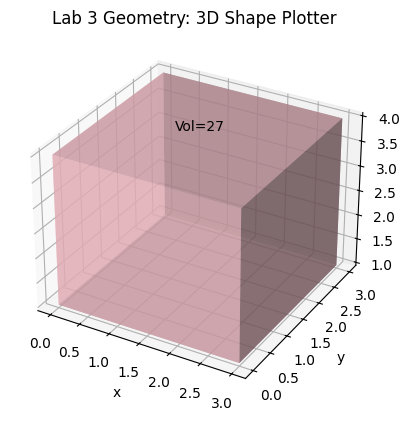

In [37]:
c1 = Cube(0, 0, 1, 3)
plotter = Shape3DPlotter()
plotter.add_shape(c1)
plotter.plot_all()
